In [1]:
'''
 1. set up script for downloading images - consistent setting
 2. get the coordinates from reports
 3. download all images
'''

'\n 1. set up script for downloading images - consistent setting\n 2. get the coordinates from reports\n 3. download all images\n'

In [8]:
#https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/77.6887,13.0194,17,0/512x512?
#access_token=pk.eyJ1IjoiZ2FyeWNjMjI3IiwiYSI6ImNrZDJyZW0xbTBld2Iycm16dGUwNzd0YjMifQ.tottdkChDH_dl9G3TUvTYw

# API parameters
access_token = 'pk.eyJ1IjoiZ2FyeWNjMjI3IiwiYSI6ImNrZDJyaWRxbDFnZGcycXF5dm8wcnptdjQifQ.Aw920Zjcv8rr6ewAj3oe1A'
pixel = '512x512'
zoom = '17'
username = 'mapbox'
style_id = 'satellite-v9'
bearing = '0'


In [12]:
coord = '77.6887,13.0194'  #TO modify

In [13]:
URL = f"https://api.mapbox.com/styles/v1/{username}/{style_id}/static/{coord},{zoom},{bearing}/{pixel}?access_token={access_token}"

In [17]:
import requests

In [18]:
res = requests.get(URL)

In [59]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np

img = res.content
in_memory_file = io.BytesIO(img)
img = Image.open(in_memory_file)



In [60]:
img.save('data/image.jpg')
# img.show()

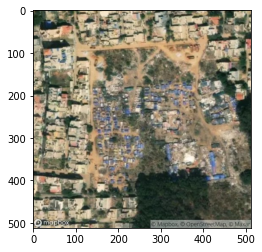

In [57]:
img = np.asarray(img)
plt.imshow(img)

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('report.xlsx')

In [16]:
# df

In [5]:
new_df = df.dropna(subset=['GPS Coordinates (Latitude)','GPS Coordinates (Longitude)' ])

In [6]:
new_df.reset_index(drop=True)

,ID,City,Community: Community Name,GPS Coordinates (Latitude),GPS Coordinates (Longitude),w3w Address,Number of Tents,Count of Customers,Shanty or Pukka Community?,Electrified?,Number of Tents Without Electricity
0,1000,Bangalore,Gas community,12.944133,77.536301,debit.beans.ballooned,97.0,262,Pukka (Concrete houses),Not Electrified,97.0
1,1001,Bangalore,Anaconda Community,12.929886,77.539246,badly.webcams.exposes,43.0,109,NaN,Partially Electrified,NaN
2,1002,Bangalore,Pigroot,12.913011,77.547458,segments.suddenly.buckling,52.0,237,NaN,Not Electrified,52.0
3,1003,Bangalore,Nagar Bhivi (Small),12.960638,77.515369,fatherly.madness.firework,2.0,18,NaN,Not Electrified,NaN
4,1004,Bangalore,Kodukalli,13.000383,77.724758,NaN,30.0,26,Shanty (Tents),Fully Electrified,10.0
...,...,...,...,...,...,...,...,...,...,...,...
2631,4193,Bangalore,mami,12.946084,77.518329,between.marching.cherubs,70.0,210,NaN,NaN,70.0
2632,4197,Bangalore,Hoodi railway gate,12.997552,77.716562,streak.jumpy.incurring,60.0,359,Shanty (Tents),Not Electrified,NaN
2633,4199,Bangalore,NR Layout,13.027088,77.677830,binds.sprains.relieves,21.0,65,NaN,Not Electrified,21.0
2634,4200,Bangalore,Oramavu,13.023927,77.660976,NaN,20.0,36,Shanty (Tents),Not Electrified,20.0


In [15]:
from download_image import download_img

for index, row in new_df.iterrows():
    ID = row['ID']
    lat = row['GPS Coordinates (Latitude)']
    long = row['GPS Coordinates (Longitude)']
    coord = f"{long},{lat}"
    download_img(ID, coord)
    

KeyboardInterrupt: 

In [14]:
download_img(ID, coord)

1000